In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [8]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [10]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

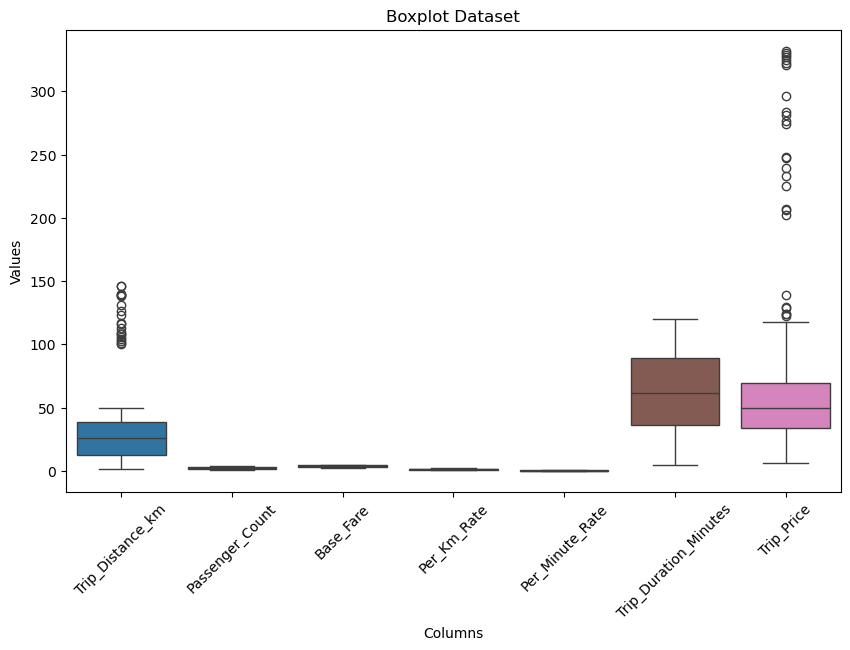

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df )
plt.title('Boxplot Dataset')
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [14]:
for column in ['Trip_Distance_km', 'Trip_Price']:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

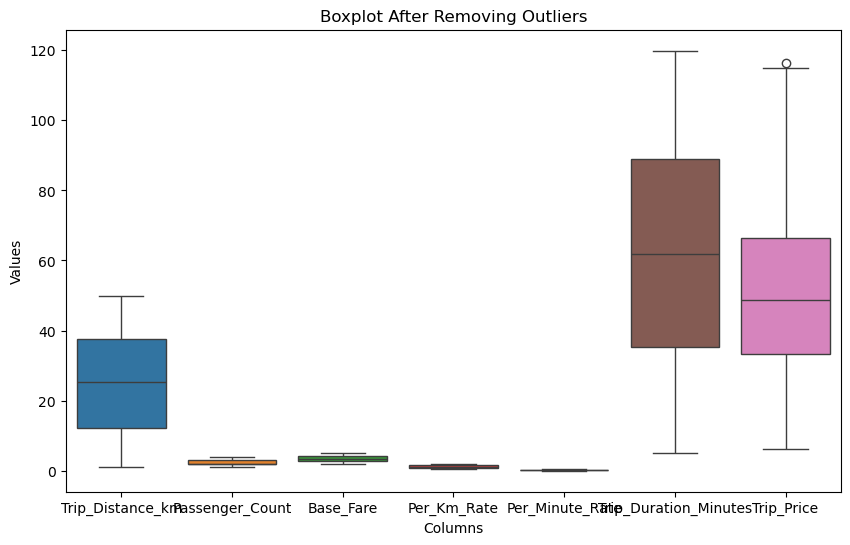

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title("Boxplot After Removing Outliers")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [18]:
Time_of_Day = {'Morning': 1, 'Afternoon	': 2, 'Evening': 3}
df['Time_of_Day'] = df['Time_of_Day'].map(Time_of_Day)

Day_of_Week = {'Weekday': 1}
df['Day_of_Week'] = df['Day_of_Week'].map(Day_of_Week)

Traffic_Conditions = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic_Conditions'] = df['Traffic_Conditions'].map(Traffic_Conditions)

Weather = {'Clear': 1,'Rain':2}
df['Weather'] = df['Weather'].map(Weather)

In [20]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1.0,1.0,3.0,1.0,1.0,3.56,0.80,0.32,53.82,36.2624
2,36.87,3.0,NaN,1.0,3.0,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,3.0,1.0,4.0,1.0,NaN,3.48,0.51,0.15,116.81,36.4698
5,8.64,NaN,NaN,2.0,2.0,1.0,2.55,1.71,0.48,89.33,60.2028
6,3.85,NaN,1.0,4.0,3.0,2.0,3.51,1.66,NaN,5.05,11.2645
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,NaN,NaN,4.0,2.0,1.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,NaN,1.0,4.0,2.0,1.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,1.0,1.0,3.0,1.0,2.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,1.0,1.0,1.0,1.0,1.0,2.67,0.82,0.17,114.94,61.2090


In [22]:
df.describe()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,874.000000,423.000000,563.0,831.000000,827.000000,781.000000,832.000000,833.000000,829.000000,831.000000,874.000000
mean,24.911076,1.860520,1.0,2.486161,1.772672,1.258643,3.504952,1.228607,0.291701,61.923622,51.684521
std,14.326202,0.991397,0.0,1.098515,0.742405,0.438170,0.869214,0.428936,0.115772,32.453957,23.323783
min,1.230000,1.000000,1.0,1.000000,1.000000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.117500,1.000000,1.0,2.000000,1.000000,1.000000,2.730000,0.860000,0.190000,35.470000,33.347975
50%,25.245000,1.000000,1.0,2.000000,2.000000,1.000000,3.520000,1.220000,0.290000,61.790000,48.614900
75%,37.575000,3.000000,1.0,3.000000,2.000000,2.000000,4.260000,1.590000,0.390000,88.960000,66.472650
max,49.990000,3.000000,1.0,4.000000,3.000000,2.000000,5.000000,2.000000,0.500000,119.840000,116.420600


## Missing Values

In [24]:
# Handle missing values for numerical data
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [26]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [28]:
# Process data
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']

In [30]:
# Taining
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", rmse)

Mean Squared Error (MSE): 56.006569694657934
R-squared (R2): 7.483753716862811


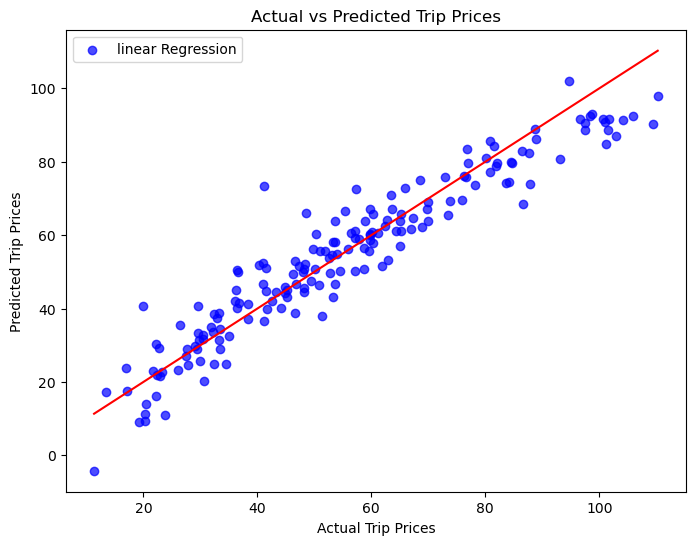

In [36]:
#Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue',label ='linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Trip Prices')
plt.ylabel('Predicted Trip Prices')
plt.title('Actual vs Predicted Trip Prices')
plt.legend()
plt.show()